Data wrangling  of proteomics data - fetch peptide counts and Accession names

In [143]:
# Import packages needed for the notebook
import math
import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles

In [144]:
# Read the Excel file into a pandas DataFrame (df)
df_proteomics = pd.read_excel('../Data/03_Proteomics_data/20221124_FJ_E1200_MWN_15cm_140min_500ng_#1572_proteins.xlsx')
df_proteomics

,Checked,Protein FDR Confidence: Combined,Master,Accession,Description,Exp. q-value: Combined,Sum PEP Score,Coverage [%],# Peptides,# PSMs,...,"Found in Sample: [S23] F23: Sample, 8","Found in Sample: [S24] F24: Sample, 9","Found in Sample: [S25] F25: Sample, 10","Found in Sample: [S26] F26: Sample, 11","Found in Sample: [S27] F27: Sample, 12","Found in Sample: [S28] F28: Sample, 13","Found in Sample: [S29] F29: Sample, 14","Found in Sample: [S30] F30: Sample, 15",# Protein Groups,Modifications
0,False,High,Master Protein,AO090003000935-T-p1,transcript=AO090003000935-T | gene=AO090003000...,0.000,599.687,89,31,7127,...,High,High,High,High,High,High,High,High,1,NaN
1,False,High,Master Protein,AO090023000944-T-p1,transcript=AO090023000944-T | gene=AO090023000...,0.000,523.784,68,32,3237,...,High,High,High,Peak Found,Peak Found,High,High,High,1,NaN
2,False,High,Master Protein,AO090003001591-T-p1,transcript=AO090003001591-T | gene=AO090003001...,0.000,519.742,68,33,2987,...,High,High,Not Found,Not Found,Not Found,High,High,High,1,NaN
3,False,High,Master Protein,RFP_Fusion,RFP_Fusion,0.000,450.464,64,35,398,...,High,Peak Found,High,Peak Found,High,High,High,High,1,NaN
4,False,High,Master Protein,AO090005001300-T-p1,transcript=AO090005001300-T | gene=AO090005001...,0.000,384.472,90,45,554,...,High,High,High,High,High,High,High,High,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,False,Medium,Master Protein,AO090001000075-T-p1,transcript=AO090001000075-T | gene=AO090001000...,0.044,1.795,4,1,1,...,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,1,NaN
862,False,Medium,Master Protein,AO090005001355-T-p1,transcript=AO090005001355-T | gene=AO090005001...,0.046,1.790,14,1,1,...,Peak Found,Peak Found,Peak Found,Not Found,Peak Found,Not Found,Peak Found,Not Found,1,NaN
863,False,Medium,Master Protein,AO090003000247-T-p1,transcript=AO090003000247-T | gene=AO090003000...,0.047,1.779,4,1,1,...,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Not Found,Not Found,Not Found,1,Met-loss [N-Term]
864,False,Medium,Master Protein,AO090001000680-T-p1,transcript=AO090001000680-T | gene=AO090001000...,0.048,1.774,1,1,1,...,Not Found,Not Found,Peak Found,Peak Found,Not Found,Peak Found,High,Peak Found,1,NaN


In [145]:
# Isolate scaled, normalized and raw abundance values from the proteomics dataframe (df_proteomics)
ab_scaled = df_proteomics.filter(like='Abundances (Scaled)')
ab_normalized = df_proteomics.filter(like='Abundances (Normalized)')
ab_raw = df_proteomics.filter(like='Abundance')
ab_scaled

#========================= ALTERNATIVE ===============================#
#ab_scaled = df_proteomics.iloc[:, 25:40]
#ab_normalized = df_proteomics.iloc[:, 41:54]
#ab_raw = df_proteomics.iloc[:, 55:70]
#=====================================================================#

,"Abundances (Scaled): F16: Sample, 1","Abundances (Scaled): F17: Sample, 2","Abundances (Scaled): F18: Sample, 3","Abundances (Scaled): F19: Sample, 4","Abundances (Scaled): F20: Sample, 5","Abundances (Scaled): F21: Sample, 6","Abundances (Scaled): F22: Sample, 7","Abundances (Scaled): F23: Sample, 8","Abundances (Scaled): F24: Sample, 9","Abundances (Scaled): F25: Sample, 10","Abundances (Scaled): F26: Sample, 11","Abundances (Scaled): F27: Sample, 12","Abundances (Scaled): F28: Sample, 13","Abundances (Scaled): F29: Sample, 14","Abundances (Scaled): F30: Sample, 15"
0,5.4,4.3,7.4,238.6,245.2,282.2,20.2,11.5,11.1,142.5,176.7,160.5,81.0,35.7,77.8
1,242.7,250.1,258.5,6.1,0.9,1.0,155.0,208.9,210.3,4.7,0.3,0.2,42.9,72.6,45.7
2,231.8,214.1,244.3,3.4,2.3,1.7,175.8,199.0,215.1,3.1,1.1,0.9,62.8,84.6,60.1
3,0.5,0.5,0.4,0.4,1.4,1.3,0.4,0.5,0.4,1.4,1.9,0.7,479.1,512.4,498.7
4,96.3,38.4,17.0,255.3,92.4,95.8,39.1,12.9,15.8,243.4,157.8,152.6,89.7,111.3,82.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,201.7,18.7,NaN,NaN,NaN,NaN,139.0,NaN,38.7,134.7,16.7,18.6,239.4,431.0,261.4
862,64.6,146.2,NaN,547.8,NaN,314.5,NaN,51.6,32.2,78.7,NaN,80.3,NaN,184.2,NaN
863,NaN,NaN,NaN,NaN,NaN,NaN,223.8,NaN,86.4,518.4,334.1,337.3,NaN,NaN,NaN
864,NaN,NaN,NaN,NaN,NaN,NaN,75.7,NaN,NaN,138.2,118.0,NaN,250.9,673.0,244.1


# Observed (Proteomics) vs Predicted (SignalP) signal peptides

In [146]:
# Read the Excel file into a pandas dataframe (df_singalp)
df_signalP = pd.read_excel('../Data/01_SignalP_output/sigpep_predictt.xlsx')
df_signalP

,gene,start_pos,end_pos,signal_peptide_likelyhood,sequence
0,AO090005000016-T-p1,0,23,0.999803,MAPSHSFMLFLSVICTHLCSLVV
1,AO090005000029-T-p1,0,23,0.999835,MHLRNIVIALAATAVASPVDLQD
2,AO090005000042-T-p1,0,23,0.999843,MKASFISRLLSLTAFAISSNLSY
3,AO090005000053-T-p1,0,41,0.854809,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL
4,AO090005000059-T-p1,0,18,0.999821,MHLQATLAVGLSLLGLTL
...,...,...,...,...,...
1056,AO090103000483-T-p1,0,19,0.833106,MKTSFLLAAIGFLYRLPCS
1057,AO090103000487-T-p1,0,19,0.999710,MTRYLSFLFLLILFGNSVF
1058,AO090103000493-T-p1,0,17,0.999791,MRGIVALSFLSVALGVT
1059,AO090701000994-T-p1,0,18,0.999845,MRLLLIAPLFSAVSYGAQ


Carry out statistical analysis - calculate mean of all abundances (all_ab) per Accession

In [147]:
# Calculate mean abundances per Accession by using the abundances variable
df_proteomics['Mean abundances (Scaled)'] = ab_scaled.mean(axis=1)
df_proteomics['Mean abundances (Normalized)'] = ab_normalized.mean(axis=1)
df_proteomics['Mean abundances (Raw)'] = ab_raw.mean(axis=1)

# Print mean abundances per Accession
df_all_ab = df_proteomics.loc[:, ['Accession', 'Mean abundances (Scaled)', 'Mean abundances (Normalized)', 'Mean abundances (Raw)']]
df_all_ab

,Accession,Mean abundances (Scaled),Mean abundances (Normalized),Mean abundances (Raw)
0,AO090003000935-T-p1,100.006667,2.835820e+09,1.454661e+09
1,AO090023000944-T-p1,99.993333,1.562914e+08,9.020611e+07
2,AO090003001591-T-p1,100.006667,6.804491e+09,3.935246e+09
3,RFP_Fusion,100.000000,2.090748e+08,1.286826e+08
4,AO090005001300-T-p1,100.006667,1.193228e+08,6.380544e+07
...,...,...,...,...
861,AO090001000075-T-p1,149.990000,2.157569e+05,1.290846e+05
862,AO090005001355-T-p1,166.677778,8.663017e+04,4.583030e+04
863,AO090003000247-T-p1,300.000000,4.195089e+05,2.226561e+05
864,AO090001000680-T-p1,249.983333,6.983411e+04,4.288789e+04


Cross-reference with predicted signal peptides in notebook 00 and make a dataframe containing the parameters:
- Accession
- Peptide count
- Signal peptide likelyhood
- Mean abundances scaled and normalized
- Peptide sequence

In [148]:
# Reset the index of the dataframe (df_signalp) and save as processed dataframe (df_signalpp)
df_signalPP = df_signalP.reset_index()
# Change the name of the "gene" in the df_signalp dataframe into "Accession" in the df_signalpp
# This will allow us to merge the df_proteomics and df_singalpp on a specific parameter such as "Accession"
df_signalPP = df_signalP.rename(columns={'gene': 'Accession'})

# Merge the dataframes (df_proteomics and df_singalpp)
# The resulting dataframe(df_merged_prosig) contains only the variables matching among the two dataframes
df_merged_proteomics_signalP = pd.merge(df_proteomics, df_signalPP, on='Accession')

# Select and print the desired parameters
df_merged_proteomics_signalPP = df_merged_proteomics_signalP[['Accession', '# Peptides', 'signal_peptide_likelyhood', 'Mean abundances (Scaled)', 'Mean abundances (Normalized)', 'Mean abundances (Raw)', 'sequence']]
df_merged_proteomics_signalPP

,Accession,# Peptides,signal_peptide_likelyhood,Mean abundances (Scaled),Mean abundances (Normalized),Mean abundances (Raw),sequence
0,AO090003000935-T-p1,31,0.999834,100.006667,2.835820e+09,1.454661e+09,MEAFNLHNFLSSLYILLPFVILANPVH
1,AO090023000944-T-p1,32,0.999845,99.993333,1.562914e+08,9.020611e+07,MMVAWWSLFLYGLQVAAPAL
2,AO090003001591-T-p1,33,0.999866,100.006667,6.804491e+09,3.935246e+09,MMVAWWSLFLYGLQVAAPAL
3,AO090010000746-T-p1,37,0.999747,99.993333,3.827300e+08,2.278721e+08,MVSFSSCLRALALGSSVLAVQPVL
4,AO090026000003-T-p1,29,0.848574,100.000000,2.685090e+08,1.636808e+08,MAVRIARFLGLSTVAYLALANGID
...,...,...,...,...,...,...,...
251,AO090020000279-T-p1,1,0.999775,187.500000,3.736761e+05,2.027508e+05,MKVQHLSSPFLLFLLPAIAT
252,AO090011000174-T-p1,1,0.999818,187.500000,1.278171e+05,7.744468e+04,MQLLPVALLLGALAAPTA
253,AO090023000365-T-p1,1,0.999822,NaN,NaN,NaN,MRDFLSLLGLASIIASSS
254,AO090010000562-T-p1,1,0.999807,115.400000,1.123077e+05,6.003625e+04,MILGLIASLGQAAVAA


# Media specific statistical analysis

Make a statistical comparison of different media compositions by caluclating mean abundances for the scaled and raw abundances data. Borth scaled and raw abundace samples carry the same name:
- Sample: 1 (F16), 2 (F17), and 3 (F18)   = Minimum media (mM)
- Sample 13 (F28), 14 (F29), and 15 (F30) = Minimum meadia with more Nitrogen (mMN) 

In order to make correct seelction, we will create a boolean mask which will allow us to select dataframe variables according to specific characters they contain in the dataframe such as using 'Scaled' to select scaled abundances and 'Abundance' to select raw abundances


In [149]:
# Create a boolean mask that is True for columns that contain "Scaled" and "F16", "F17", or "F18"
mM_s_mask = df_proteomics.columns.str.contains('Scaled', 'Abundance') & df_proteomics.columns.str.contains('F16|F17|F18', regex=True)
mMN_s_mask = df_proteomics.columns.str.contains('Scaled', 'Abundance') & df_proteomics.columns.str.contains('F28|F29|F30', regex=True)
# Create a boolean mask that is True for columns that contain "Abundance" and "F16", "F17", or "F18"
mM_r_mask = df_proteomics.columns.str.contains('Abundance') & df_proteomics.columns.str.contains('F16|F17|F18', regex=True)
mMN_r_mask = df_proteomics.columns.str.contains('Abundance') & df_proteomics.columns.str.contains('F28|F29|F30', regex=True)

# Use the mask to select the columns you are interested
mM_s = df_proteomics.loc[:,mM_s_mask]
mMN_s = df_proteomics.loc[:,mMN_s_mask]
mM_r = df_proteomics.loc[:,mM_r_mask]
mMN_r = df_proteomics.loc[:,mMN_r_mask]

### Mean of scaled and raw abundances (ab_sr)

In [150]:
# Calculate mean abundances per Accession by using the abundances variable
df_proteomics['mM mean abundances (Scaled)'] = mM_s.mean(axis=1)
df_proteomics['mMN mean abundances (Scaled)'] = mMN_s.mean(axis=1)
df_proteomics['mM mean abundances (Raw)'] = mM_r.mean(axis=1)
df_proteomics['mMN mean abundances (Raw)'] = mMN_r.mean(axis=1)

# Print mean of scaled (s) abundances per Accession
ab_sr_mean = df_proteomics.loc[:, ['Accession', 'mM mean abundances (Scaled)', 'mMN mean abundances (Scaled)', 'mM mean abundances (Raw)', 'mMN mean abundances (Raw)']] 
ab_sr_mean

,Accession,mM mean abundances (Scaled),mMN mean abundances (Scaled),mM mean abundances (Raw),mMN mean abundances (Raw)
0,AO090003000935-T-p1,5.700000,64.833333,8.936440e+07,1.111282e+09
1,AO090023000944-T-p1,250.433333,53.733333,2.182302e+08,5.242175e+07
2,AO090003001591-T-p1,230.066667,69.166667,8.710568e+09,2.923823e+09
3,RFP_Fusion,0.466667,496.733333,5.633231e+05,6.398293e+08
4,AO090005001300-T-p1,50.566667,94.433333,3.343308e+07,6.991275e+07
...,...,...,...,...,...
861,AO090001000075-T-p1,110.200000,310.600000,8.664617e+04,2.793331e+05
862,AO090005001355-T-p1,105.400000,184.200000,3.158086e+04,6.389598e+04
863,AO090003000247-T-p1,NaN,NaN,NaN,NaN
864,AO090001000680-T-p1,NaN,389.333333,NaN,6.911270e+04


### Normalization of abundances

In [151]:
# Apply Min-Max normalization 
mM_s_norm = (mM_s- mM_s.min()) / (mM_s.max() - mM_s.min())
mMN_s_norm = (mMN_s - mMN_s.min()) / (mMN_s.max() - mMN_s.min())
mM_r_norm = (mM_r - mM_r.min()) / (mM_r.max() - mM_r.min())
mMN_r_norm = (mMN_r - mMN_r.min()) / (mMN_r.max() - mMN_r.min())

#============ Alternative =============#
# Create a scalar object
#scaler = MinMaxScaler()

# Normalize the scaled abundance values
#mm_norm = scaler.fit_transform(mm)
#rm_norm = scaler.fit_transform(rm)
#======================================#

### Mean of normalized abundances (abNorm) 

In [152]:
# Calculate mean of scaled + normalized abundances per Accession
df_proteomics['mM mean abNorm (Scaled)'] = mM_s_norm.mean(axis=1)
df_proteomics['mMN mean abNorm (Scaled)'] = mMN_s_norm.mean(axis=1)
df_proteomics['mM mean abNorm (Raw)'] = mM_r_norm.mean(axis=1)
df_proteomics['mMN mean abNorm (Raw)'] = mMN_r_norm.mean(axis=1)

#======================================================= ALTERNATIVE ================================================================#
# Create a scalar object
#scaler = MinMaxScaler() 
#df_proteomics[
#    ['mM mean abundances (Scaled)','mMN mean abundances (Scaled)', 'mM mean abundances (Raw)','mMN mean abundances (Raw)']] = scaler.fit_transform(df[
#        ['mM mean abundances (Scaled)','mMN mean abundances (Scaled)', 'mM mean abundances (Raw)','mMN mean abundances (Raw)']
#        ])
        
#df_norm = df_proteomics.rename(
#    columns = {
#        'mM mean abundances (Scaled)':'mM mean abundances (S-Normalized)',
#        'mMN mean abundances (Scaled)':'mMN mean abundances (S-Normalized)',
#        'mM mean abundances (Raw)':'mM mean abundances (R-Normalized)',
#        'mMN mean abundances (Raw)':'mMN mean abundances (R-Normalized)'}
#        )
#====================================================================================================================================#

# Merge the dataframes to include sequence list of signal peptides
df_merged_media = pd.merge(df_proteomics, df_signalpp, on='Accession')

# Print dataframe of normalized mean abundances per Accession
df_abNorm_mean = df_merged_media.loc[:, ['Accession', 'mM mean abNorm (Scaled)', 'mMN mean abNorm (Scaled)', 'mM mean abNorm (Raw)', 'mMN mean abNorm (Raw)', 'sequence']]
df_abNorm_mean

,Accession,mM mean abNorm (Scaled),mMN mean abNorm (Scaled),mM mean abNorm (Raw),mMN mean abNorm (Raw),sequence
0,AO090003000935-T-p1,0.007994,0.059285,0.009481,0.298377,MEAFNLHNFLSSLYILLPFVILANPVH
1,AO090023000944-T-p1,0.356292,0.044270,0.135472,0.026509,MMVAWWSLFLYGLQVAAPAL
2,AO090003001591-T-p1,0.329555,0.058537,0.776518,0.686179,MMVAWWSLFLYGLQVAAPAL
3,AO090010000746-T-p1,0.149639,0.228295,0.067127,0.221652,MVSFSSCLRALALGSSVLAVQPVL
4,AO090026000003-T-p1,0.001087,0.414383,0.000458,0.322740,MAVRIARFLGLSTVAYLALANGID
...,...,...,...,...,...,...
251,AO090020000279-T-p1,NaN,0.092233,NaN,0.030774,MKVQHLSSPFLLFLLPAIAT
252,AO090011000174-T-p1,NaN,0.310975,NaN,0.103691,MQLLPVALLLGALAAPTA
253,AO090023000365-T-p1,NaN,NaN,NaN,NaN,MRDFLSLLGLASIIASSS
254,AO090010000562-T-p1,0.115743,0.045944,0.038584,0.015320,MILGLIASLGQAAVAA


In [153]:
# Print a summary dataframe of scaled and raw anundances including the mean abundance and normalized mean abundance parameters per Accession
df_sum_abNorm_s = df_merged_media.loc[:, ['Accession', 'mM mean abundances (Scaled)', 'mMN mean abundances (Scaled)', 'mM mean abNorm (Scaled)', 'mMN mean abNorm (Scaled)']]
df_sum_abNorm_r = df_merged_media.loc[:, ['Accession', 'mM mean abundances (Raw)', 'mMN mean abundances (Raw)', 'mM mean abNorm (Raw)', 'mMN mean abNorm (Raw)']]
df_sum_abNorm_r

,Accession,mM mean abundances (Raw),mMN mean abundances (Raw),mM mean abNorm (Raw),mMN mean abNorm (Raw)
0,AO090003000935-T-p1,8.936440e+07,1.111282e+09,0.009481,0.298377
1,AO090023000944-T-p1,2.182302e+08,5.242175e+07,0.135472,0.026509
2,AO090003001591-T-p1,8.710568e+09,2.923823e+09,0.776518,0.686179
3,AO090010000746-T-p1,2.254124e+08,6.251367e+08,0.067127,0.221652
4,AO090026000003-T-p1,1.245769e+06,7.744512e+08,0.000458,0.322740
...,...,...,...,...,...
251,AO090020000279-T-p1,NaN,1.278856e+05,NaN,0.030774
252,AO090011000174-T-p1,NaN,1.550234e+05,NaN,0.103691
253,AO090023000365-T-p1,NaN,NaN,NaN,NaN
254,AO090010000562-T-p1,4.367198e+04,3.486822e+04,0.038584,0.015320


In [154]:
# Convert and save the summary dataframes (.csv or .xlsx)
df_sum_abNorm_s.to_excel('../Data/04_Data_wrangling/abNorm_scaled.xlsx', index=False)
df_sum_abNorm_r.to_excel('../Data/04_Data_wrangling/abNorm_raw.xlsx', index=False)

Normalize the scaled mean abundances to have data for machine learning and statistical comparison

In [155]:
# Normalize the values in "Mean abundances (MM)"
#df["Normalized1"] = df["Scaled mean abundances (MM)"] / df["Scaled mean abundances (MM)"].max() * 100

# Normalize the values in "Mean abundances (RM)"
#df["Normalized2"] = df["Scaled mean abundances (RM)"] / df["Scaled mean abundances (RM)"].max() * 100

# Print mean abundances per Gene ID
#n_ab_mean = df.loc[:, ['Accession', 'Normalized1', 'Normalized2']]
#n_ab_mean

# Create FASTA files for DeepLoc predictions

### FASTA files for SignalP data

In [156]:
# Define the FASTA format function
def fasta_format(row):
    return f">{row['Accession']}\n{row['sequence']}\n"

# Apply the function to the dataframes
df_signalpp['fasta'] = df_signalpp.apply(fasta_format, axis=1)

# Create the FASTA file
with open("../Data/04_Data_wrangling/Sigpep_deeploc/signalP_proteins_all.fasta", "w") as f:
    for index, row in df_signalpp.iterrows():
        f.write(row["fasta"] + "\n")

In [157]:
path_signalP_proteins_all = '../Data/04_Data_wrangling\Sigpep_deeploc\signalP_proteins_all.fasta' 

# Open file with "with" statement to avoid problems with access 
proteins = []

with open(path_signalP_proteins_all , mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):

        # Extract individual parts of the FASTA record
        identifier = record.id
        description = record.description
        sequence = record.seq
        # Append
        proteins.append(record)

In [158]:
# Divide the deeploc_signalP_Aoryzae_all.fasta file into two partitions 
signalP_proteins_par1 = proteins[0:400]
signalP_proteins_par2 = proteins[400:800]
signalP_proteins_par3 = proteins[800:]

# Check the size of each partition and if they add up to 1
all_partitions = [[signalP_proteins_par1]+[signalP_proteins_par2]+[signalP_proteins_par3]]
all_partitions = [signalP_proteins_par1+signalP_proteins_par2+signalP_proteins_par2]

print(len(signalP_proteins_par1), "number of protein sequences")
print(len(signalP_proteins_par2), "number of protein sequences")
print(len(signalP_proteins_par3), "number of protein sequences")
print(len(all_partitions))

400 number of protein sequences
400 number of protein sequences
261 number of protein sequences
1


In [159]:
# Write partitions into two separate fasta files
with open(f"../Data/04_Data_wrangling/Sigpep_deeploc/deeploc_signalP1.fasta", "w") as output_handle:
    SeqIO.write(signalP_proteins_par1, output_handle, "fasta")
with open(f"../Data/04_Data_wrangling/Sigpep_deeploc/deeploc_signalP2.fasta", "w") as output_handle:
    SeqIO.write(signalP_proteins_par2, output_handle, "fasta")
with open(f"../Data/04_Data_wrangling/Sigpep_deeploc/deeploc_signalP3.fasta", "w") as output_handle:
    SeqIO.write(signalP_proteins_par3, output_handle, "fasta")
    

### FASTA files for Merged (SinalP and Proteomics) data

In [160]:
# Define the FASTA format function
def fasta_format(row):
    return f">{row['Accession']}\n{row['sequence']}\n"

# Apply the function to the dataframes
df_abNorm_mean['fasta'] = df_abNorm_mean.apply(fasta_format, axis=1)

# Create the FASTA file
with open("../Data/04_Data_wrangling/Sigpep_deeploc/deeploc_merge_signalP_proteomics.fasta", "w") as f:
    for index, row in df_abNorm_mean.iterrows():
        f.write(row["fasta"] + "\n")

### FASTA files for Merged (Proteomics and A.oryzae) data

In [161]:
path_Aoryzae_proteins = '../Data/00_All_proteins_and_partitions_Aoryzae/FungiDB-59_AoryzaeRIB40_AnnotatedProteins.fasta'  

# Open file with "with" statement to avoid problems with access 
proteins = []

with open(path_Aoryzae_proteins, mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
        proteins.append(record)

# Coss ref with proteomics acc numbers
list_of_protemics_acc_numbers = df_proteomics['Accession'].tolist() # here put the list

new_list_of_the_proteins_for_deeploc = []
for seq in proteins: 
    if seq.id in list_of_protemics_acc_numbers: 
        new_list_of_the_proteins_for_deeploc.append(seq)

# Write it to a fasta file
with open(f"../Data/04_Data_wrangling/deeploc_proteomics_all.fasta", "w") as output_handle:
    SeqIO.write(new_list_of_the_proteins_for_deeploc, output_handle, "fasta")

In [162]:
# Divide the deeploc_proteins.fasta file into two partitions 
deeploc_proteins_par1 = new_list_of_the_proteins_for_deeploc[0:432]
deeploc_proteins_par2 = new_list_of_the_proteins_for_deeploc[432:]

# Check the size of each partition and if they add up to 1
all_partitions = [[deeploc_proteins_par1]+[deeploc_proteins_par2]]
all_partitions = [deeploc_proteins_par1+deeploc_proteins_par2]

print(len(deeploc_proteins_par1), "number of protein sequences")
print(len(deeploc_proteins_par2), "number of protein sequences")
print(len(all_partitions))

432 number of protein sequences
433 number of protein sequences
1


In [163]:
# Write partitions into two separate fasta files
with open(f"../Data/04_Data_wrangling/deeplocproteomics1.fasta", "w") as output_handle:
    SeqIO.write(deeploc_proteins_par1, output_handle, "fasta")
with open(f"../Data/04_Data_wrangling/deeploc_mergeproteomics2.fasta", "w") as output_handle:
    SeqIO.write(deeploc_proteins_par2, output_handle, "fasta")

# Concatenating the DeepLoc outcomes

### Concatenate SignalP results

In [164]:
# Load the first DeepLoc csv file into a DataFrame
df_deeploc_signalP1 =pd.read_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_signalP1.csv')

# Load the second DeepLoc csv file into a DataFrame
df_deeploc_signalP2 =pd.read_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_signalP2.csv')

# Load the second DeepLoc csv file into a DataFrame
df_deeploc_signalP3 =pd.read_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_signalP3.csv')

# Merge the data two dataframes
df_deeploc_signalP_all = pd.concat([df_deeploc_signalP1, df_deeploc_signalP2, df_deeploc_signalP3])

# Save the merged DataFrame to a new csv file
df_deeploc_signalP_all.to_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_signalP_all.csv', index=False)

### Concatenate Merged (SignalP and A.oryzae) results

In [165]:
# Load the first DeepLoc csv file into a DataFrame
df_deeploc_proteomics1 =pd.read_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_proteomics1.csv')

# Load the second DeepLoc csv file into a DataFrame
df_deeploc_proteomics2 =pd.read_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_proteomics2.csv')

# Merge the data two dataframes
df_deeploc_proteomics_all = pd.concat([df_deeploc_proteomics1, df_deeploc_proteomics2])

# Save the merged DataFrame to a new csv file
df_deeploc_proteomics_all.to_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_proteomics_all.csv', index=False)

# Data visualization

### Peptide count per Accesion by different analysis methods

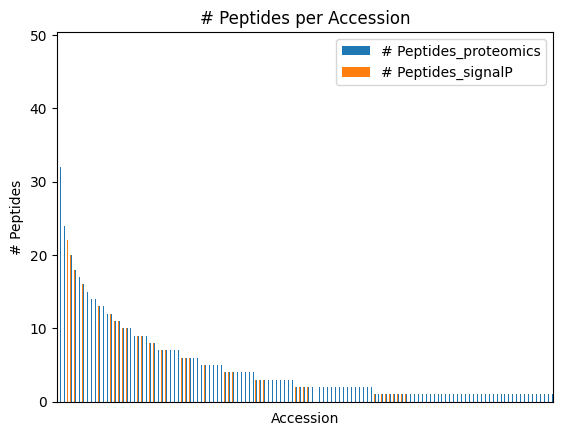

In [166]:
# Define the dataframes and extract the "Accession" and "# Peptides" columns
df_peptide_count_proteomics = df_proteomics[['Accession', '# Peptides']] 
df_peptide_count_signalP = df_merged_proteomics_signalPP[['Accession', '# Peptides']]

# Rename the "# Peptides" column to indicate which excel file it comes from
df_peptide_count_proteomics = df_peptide_count_proteomics.rename(columns={'# Peptides': '# Peptides_proteomics'})
df_peptide_count_signalP = df_peptide_count_signalP.rename(columns={'# Peptides': '# Peptides_signalP'})

# Merge the dataframes on the "Accession" column
df_peptide_count_merged = pd.merge(df_peptide_count_proteomics, df_peptide_count_signalP, on='Accession', how='outer')

# Fill any NaN values with 0
df_peptide_count_merged = df_peptide_count_merged.fillna(0)

# Sort the dataframe by "# Peptides" in descending order
df_peptide_count_merged = df_peptide_count_merged.sort_values(by=['# Peptides_proteomics', '# Peptides_signalP'], ascending=False)

# Generate the bar plot
df_peptide_count_merged.plot(x='Accession', y=['# Peptides_proteomics', '# Peptides_signalP'], kind='bar', title='# Peptides per Accession')
plt.xlabel('Accession')
plt.ylabel('# Peptides')
plt.xticks([]) # Code snippet to close all the x-axis ticks 
plt.show()

Split the big plot generated above into small subplots in decending order in order to make the Accession names visible on the x-axis

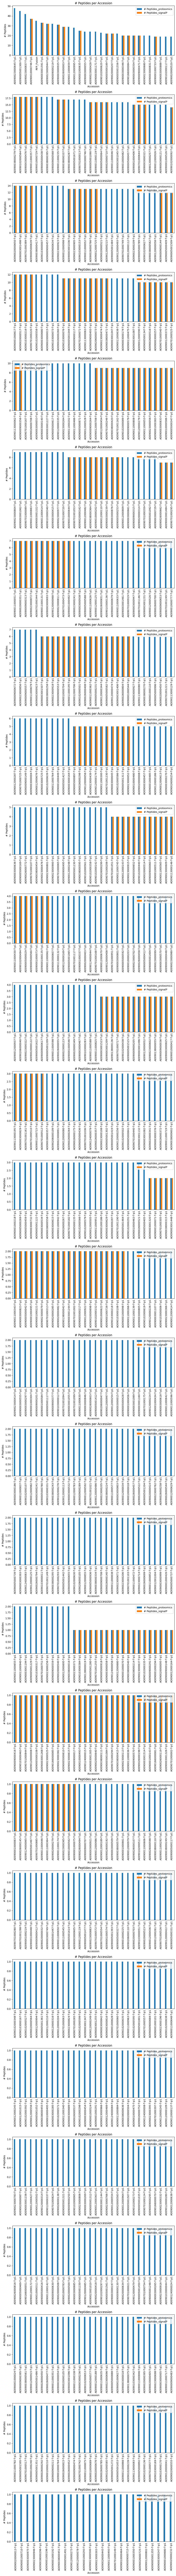

In [167]:
# Split the dataframe into chunks based on the number of subplots desired
chunk_size = 30  # Adjust this Accesssion value as needed
n = math.ceil(len(df_peptide_count_merged) / chunk_size)
df_chunks = [df_peptide_count_merged[i:i+chunk_size] for i in range(0, len(df_peptide_count_merged), chunk_size)]

# Create the subplots
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, n*5))

# Plot each chunk in a separate subplot
for i, df_chunk in enumerate(df_chunks):
    ax = axes[i]
    df_chunk.plot(x='Accession', y=['# Peptides_proteomics', '# Peptides_signalP'], kind='bar', ax=ax)
    ax.set_xlabel('Accession')
    ax.set_ylabel('# Peptides')
    ax.set_title('# Peptides per Accession')
    ax.grid(visible=False)  # Remove the gridlines
    ax.tick_params(axis='x', which='both', length=0)  # Remove the x-axis tick labels and ticks

plt.tight_layout()
plt.show()

Cross-reference the results with DeepLoc and making plots to see how many SingalP could predict correctly

### Proteomics analysis

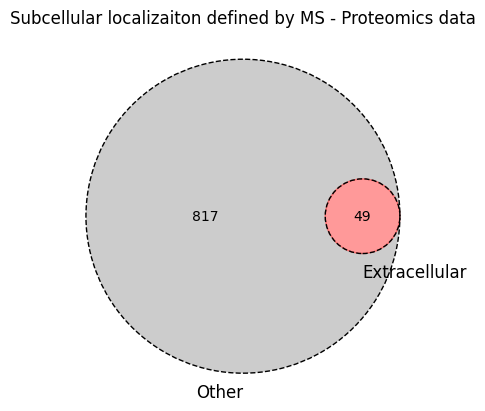

In [168]:
# Select only the rows where the cellular compartment is stated as "non-structural extracellular"
df_proteomics_excel_extra = df_proteomics[df_proteomics["Cellular Component"] == "non-structural extracellular"]

# Create the subsets
df_proteomics_acc = set(df_proteomics['Accession'])
df_proteomics_excel_extra_acc = set(df_proteomics_excel_extra['Accession'])

# Create the Venn diagram
subsets = [df_proteomics_acc, df_proteomics_excel_extra_acc]
v = venn2(subsets, set_labels=('Other', 'Extracellular'), set_colors=('gray', 'red'))
v.get_label_by_id('01').set_text('') # Set the Extracellular subset into empty label
v.get_patch_by_id('11').set_color('red') # Adjust the subset colour more specifically
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Subcellular localizaiton defined by MS - Proteomics data")
plt.show()

### DeepLoc predictions - Proteomics data

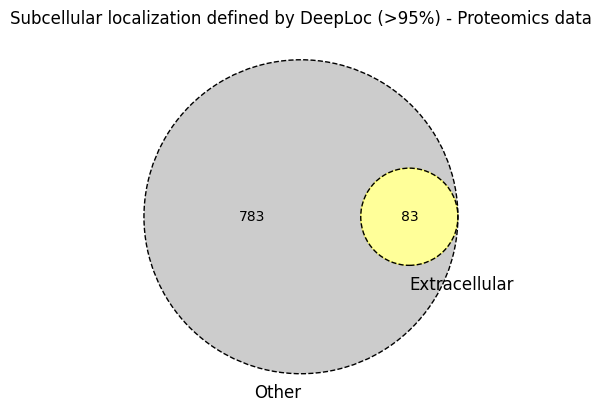

In [169]:
# Read the DeeopLoc csv file into a pandas DataFrame
df_deeploc_proteomics = pd.read_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_proteomics_all.csv')

# Select only the rows where the "extracellular" column has a value greater than 0.95
df_deeploc_proteomics_extra = df_deeploc_proteomics[df_deeploc_proteomics['Extracellular'] > 0.95]

# Create the subsets
df_proteomics_acc = set(df_proteomics['Accession'])
df_deeploc_proteomics_extra_acc = set(df_deeploc_proteomics_extra['Protein_ID'])

# Create the Venn diagram
subsets = [df_proteomics_acc, df_deeploc_proteomics_extra_acc]
v = venn2(subsets, set_labels=('Other', 'Extracellular'), set_colors=('gray', 'yellow'))
v.get_label_by_id('01').set_text('') # Set the Extracellular subset into empty label
v.get_patch_by_id('11').set_color('yellow') # Adjust the subset colour more specifically
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Subcellular localization defined by DeepLoc (>95%) - Proteomics data")
plt.show()

### Proteomics vs DeepLoc 

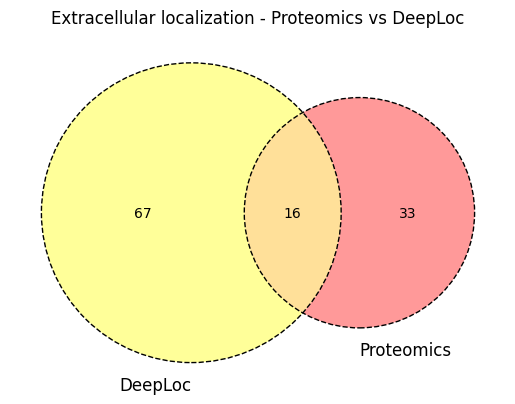

In [170]:
# Define the subsets
df_deeploc_extra_acc = set(df_deeploc_proteomics_extra['Protein_ID'])
df_proteomics_excel_extra_acc = set(df_proteomics_excel_extra['Accession'])


# Create the Venn diagram
subsets = [df_deeploc_proteomics_extra_acc, df_proteomics_excel_extra_acc]
v = venn2(subsets, set_labels=('DeepLoc', 'Proteomics'), set_colors=('yellow', 'red'))
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Extracellular localization - Proteomics vs DeepLoc")
plt.show()

### DeepLoc predictions - SignalP data

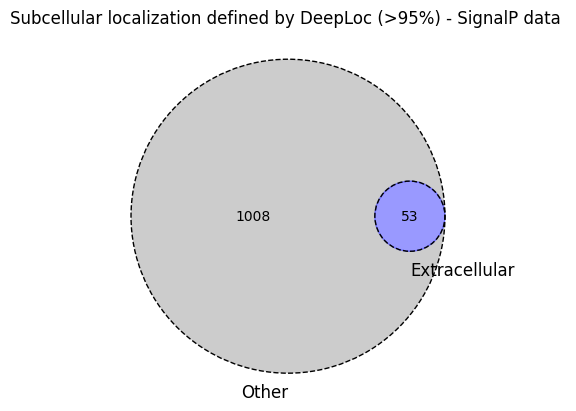

In [171]:
# Read the DeeopLoc csv file into a pandas DataFrame
df_deeploc_signalP = pd.read_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_signalP_all.csv')

# Select only the rows where the "extracellular" column has a value greater than 0.95
df_deeploc_signalP_extra = df_deeploc_signalP[df_deeploc_signalP['Extracellular'] > 0.95]

# Create the subsets
df_deeploc_signalP_acc = set(df_deeploc_signalP['Protein_ID'])
df_deeploc_signalP_extra_acc = set(df_deeploc_signalP_extra['Protein_ID'])

# Create the Venn diagram
subsets = [df_deeploc_signalP_acc, df_deeploc_signalP_extra_acc]
v = venn2(subsets, set_labels=('Other', 'Extracellular'), set_colors=('gray', 'blue'))
v.get_label_by_id('01').set_text('') # Set the Extracellular subset into empty label
v.get_patch_by_id('11').set_color('blue') # Adjust the subset colour more specifically
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Subcellular localization defined by DeepLoc (>95%) - SignalP data ")
plt.show()

### Proteomics vs SignalP

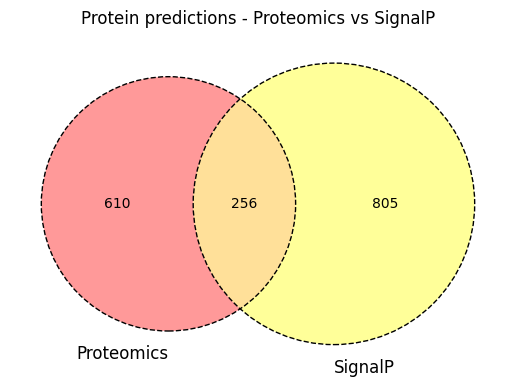

In [172]:
#  Create the subsets
df_proteomics_acc = set(df_proteomics['Accession'])
df_signalpp_acc = set(df_signalpp['Accession'])

# Create the Venn diagram
subsets = [df_proteomics_acc, df_signalpp_acc]
v = venn2(subsets, set_labels=('Proteomics', 'SignalP'), set_colors=('red', 'yellow'))
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Protein predictions - Proteomics vs SignalP")
plt.show()

### DeepLoc prediction - Merged (Proteomics vs SignalP) data

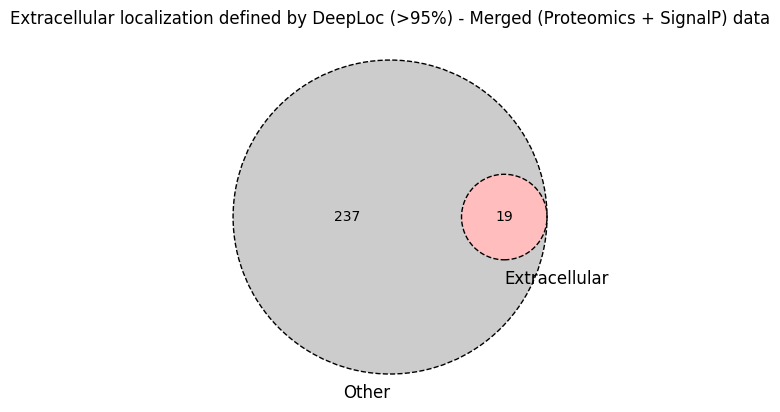

In [173]:
# Reminder_Read the DeeopLoc csv file into a pandas DataFrame
df_deeploc_merge_singnalP_proteomics = pd.read_csv('../Data/04_Data_wrangling/Deeploc_results/deeploc_merge_signalP_proteomics.csv')

# Select only the rows where the "extracellular" column has a value greater than 0.95
df_deeploc_merge_singnalP_proteomics_extra = df_deeploc_merge_singnalP_proteomics[df_deeploc_merge_singnalP_proteomics['Extracellular'] > 0.95]

# Create the subsets
df_deeploc_merge_singnalP_proteomics = set(df_deeploc_merge_singnalP_proteomics['Protein_ID'])
df_deeploc_merge_singnalP_proteomics_extra = set(df_deeploc_merge_singnalP_proteomics_extra['Protein_ID'])

# Create the Venn diagram
subsets = [df_deeploc_merge_singnalP_proteomics, df_deeploc_merge_singnalP_proteomics_extra]
v = venn2(subsets, set_labels=('Other', 'Extracellular'), set_colors=('gray', 'red'))
v.get_label_by_id('01').set_text('') # Set the Extracellular subset into empty label
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Extracellular localization defined by DeepLoc (>95%) - Merged (Proteomics + SignalP) data")
plt.show()

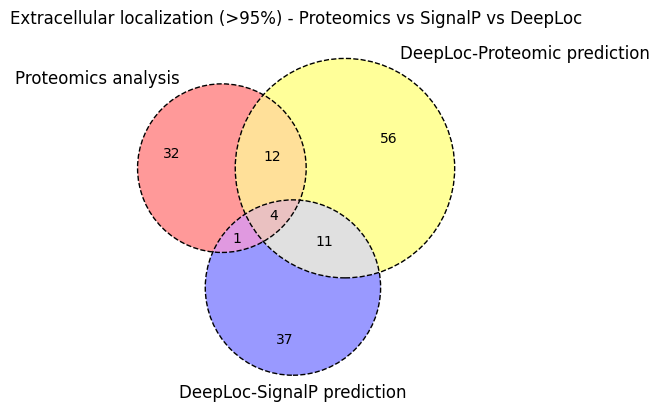

In [174]:
#  Create the subsets
df_proteomics_excel_extra_acc = set(df_proteomics_excel_extra['Accession'])
df_deeploc_proteomics_extra_acc = set(df_deeploc_proteomics_extra['Protein_ID'])
df_deeploc_signalP_extra_acc = set(df_deeploc_signalP_extra['Protein_ID'])

# Create the Venn diagram
subsets = [df_proteomics_excel_extra_acc, df_deeploc_proteomics_extra_acc, df_deeploc_signalP_extra_acc]
v = venn3(subsets, set_labels=('Proteomics analysis', 'DeepLoc-Proteomic prediction', 'DeepLoc-SignalP prediction'), set_colors=('red', 'yellow', 'blue'))
c = venn3_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Extracellular localization (>95%) - Proteomics vs SignalP vs DeepLoc")
plt.show()

In [175]:
# Extract the Accession names at the intersection of the three Venn diagrams
intersection_set = set.intersection(*[set(x) for x in subsets])
intersection_set

{'AO090001000294-T-p1',
 'AO090003001514-T-p1',
 'AO090005000029-T-p1',
 'AO090011000715-T-p1'}

In [176]:
# Convert the intersection set to a dataframe
df_intersection = pd.DataFrame({'Accession': list(intersection_set)})

# Merge the intersection dataframe with a sequence dataframe on the "Accession" column
df_merged_intersection_signalpp = df_signalpp.merge(df_intersection, on='Accession')

# Print the merged dataframe
df_merged_intersection_signalpp.loc[:, ['Accession', 'signal_peptide_likelyhood', 'sequence']]

,Accession,signal_peptide_likelyhood,sequence
0,AO090005000029-T-p1,0.999835,MHLRNIVIALAATAVASPVDLQD
1,AO090001000294-T-p1,0.999766,MRSSLLMGALCAAGAMANPLDK
2,AO090003001514-T-p1,0.999832,MYRFLVSLLGLVAGTTYAAPVPEVSSMNAV
3,AO090011000715-T-p1,0.999820,MRIGNLIVAASAASLVHAYPTRDIKK
